# C1 W3 Group 8 - Task 4

In [1]:
from tqdm import tqdm
from PIL import Image

from src.background import get_painting_masks, crop_image_by_mask
from src.data import GT_QSD2_W3_LIST
from src.denoising import denoise_image
from src.paths import QSD2_W3_PATH, WEEK_3_RESULTS_PATH, BBDD_PATH
from src.retrieval import find_top_k_similar_images
from src.utils import show_images

In [2]:
query_d2_image_PIL_list = [Image.open(query_img_path) for query_img_path in sorted(QSD2_W3_PATH.glob("*.jpg"))]  # Load once
query_d2_mask_PIL_list = [Image.open(query_img_path) for query_img_path in sorted(QSD2_W3_PATH.glob("*.png"))]  # Load once
database_image_PIL_list = [Image.open(db_img_path) for db_img_path in sorted(BBDD_PATH.glob("*.jpg"))]  # Load once

### Denoising

In [3]:
# Apply median filter
query_d2_image_PIL_list = [denoise_image(image) for image in query_d2_image_PIL_list]

### Background Removal

In [4]:
# Get painting masks
painting_masks_list = []
pbar = tqdm(zip(sorted(QSD2_W3_PATH.glob("*.jpg")), query_d2_image_PIL_list, query_d2_mask_PIL_list))
for name, image, gt_mask in pbar:
    pbar.set_description(f"Processing {name.stem}")
    painting_masks = get_painting_masks(image)    
    painting_masks_list.append(painting_masks)

Processing 00029: : 30it [00:06,  4.83it/s]


In [5]:
cropped_query_image_list = []
pbar = tqdm(zip(sorted(QSD2_W3_PATH.glob("*.jpg")), query_d2_image_PIL_list, query_d2_mask_PIL_list, painting_masks_list))
for name, image, gt_mask, predicted_mask in pbar:
    pbar.set_description(f"Splitting {name.stem}")
    image_list = crop_image_by_mask(image, predicted_mask)
    cropped_query_image_list.append(image_list)
print(cropped_query_image_list[0])

Splitting 00029: : 30it [00:00, 74.19it/s]

[<PIL.Image.Image image mode=RGB size=403x590 at 0x116307EF0>]


### Retrieval

In [6]:
retrieved_images = find_top_k_similar_images(cropped_query_image_list, database_image_PIL_list)
print(retrieved_images)

Partitioning at level 5: 100%|██████████| 39/39 [00:00<00:00, 1413.66it/s]


0 (403, 590)
<PIL.Image.Image image mode=RGB size=80x118 at 0x116197320>
<PIL.Image.Image image mode=RGB size=80x118 at 0x107945F10>
<PIL.Image.Image image mode=RGB size=80x118 at 0x11634C410>
<PIL.Image.Image image mode=RGB size=80x118 at 0x107945EE0>
<PIL.Image.Image image mode=RGB size=80x118 at 0x116025D00>
<PIL.Image.Image image mode=RGB size=80x118 at 0x107944A70>
<PIL.Image.Image image mode=RGB size=80x118 at 0x1162E7F80>
<PIL.Image.Image image mode=RGB size=80x118 at 0x11631C2C0>
<PIL.Image.Image image mode=RGB size=80x118 at 0x11631C560>
<PIL.Image.Image image mode=RGB size=80x118 at 0x1162E7EF0>
<PIL.Image.Image image mode=RGB size=80x118 at 0x11634C470>
<PIL.Image.Image image mode=RGB size=80x118 at 0x11631C170>
<PIL.Image.Image image mode=RGB size=80x118 at 0x11631C1D0>
<PIL.Image.Image image mode=RGB size=80x118 at 0x11631F3B0>
<PIL.Image.Image image mode=RGB size=80x118 at 0x116306840>
<PIL.Image.Image image mode=RGB size=80x118 at 0x11631C2F0>
<PIL.Image.Image image mode

Partitioning at level 5: 100%|██████████| 287/287 [00:04<00:00, 64.16it/s]


0 (1368, 756)
<PIL.Image.Image image mode=RGB size=273x151 at 0x11631C440>
<PIL.Image.Image image mode=RGB size=273x151 at 0x1163F4DD0>
<PIL.Image.Image image mode=RGB size=273x151 at 0x1163F50A0>
<PIL.Image.Image image mode=RGB size=273x151 at 0x1163F50D0>
<PIL.Image.Image image mode=RGB size=273x151 at 0x1163F5130>
<PIL.Image.Image image mode=RGB size=273x151 at 0x1163F5190>
<PIL.Image.Image image mode=RGB size=273x151 at 0x1163F51F0>
<PIL.Image.Image image mode=RGB size=273x151 at 0x1163F5250>
<PIL.Image.Image image mode=RGB size=273x151 at 0x1163F52B0>
<PIL.Image.Image image mode=RGB size=273x151 at 0x1163F5310>
<PIL.Image.Image image mode=RGB size=273x151 at 0x1163F5370>
<PIL.Image.Image image mode=RGB size=273x151 at 0x1163F53D0>
<PIL.Image.Image image mode=RGB size=273x151 at 0x1163F5430>
<PIL.Image.Image image mode=RGB size=273x151 at 0x1163F5490>
<PIL.Image.Image image mode=RGB size=273x151 at 0x1163F54F0>
<PIL.Image.Image image mode=RGB size=273x151 at 0x1163F5550>
<PIL.Image

Processing level 5: 100%|██████████| 287/287 [02:27<00:00,  1.94it/s]

[[[236, 65, 35, 100, 177]], [[107, 30, 53, 74, 106]], [[221, 35, 48, 205, 25], [285, 76, 85, 150, 257]], [[259, 32, 160, 192, 113]], [[86, 61, 155, 27, 125]], [[94, 192, 85, 103, 191], [132, 103, 104, 255, 87]], [[258, 42, 212, 24, 58], [35, 65, 40, 236, 120]], [[258, 42, 212, 24, 58], [35, 65, 236, 40, 47]], [[40, 161, 184, 106, 116], [258, 202, 94, 212, 22]], [[131, 110, 37, 273, 142]], [[282, 264, 103, 57, 88]], [[199, 96, 276, 173, 226], [34, 104, 142, 144, 84]], [[53, 54, 107, 238, 30], [124, 82, 29, 282, 172]], [[28, 282, 158, 59, 271]], [[260, 279, 264, 91, 101]], [[215, 192, 239, 39, 258]], [[120, 70, 40, 161, 35]], [[25, 40, 116, 35, 42]], [[11, 30, 206, 106, 254]], [[258, 176, 24, 42, 212], [264, 99, 279, 104, 259]], [[43, 57, 16, 142, 249]], [[7, 182, 119, 217, 278]], [[251, 35, 65, 189, 234]], [[183, 75, 258, 24, 23]], [[179, 219, 155, 218, 133]], [[270, 47, 36, 24, 40]], [[93, 142, 16, 157, 140]], [[200, 205, 150, 35, 146]], [[161, 40, 116, 35, 70]], [[120, 36, 47, 35, 221

[[236, 65, 35, 100, 177]] [236]


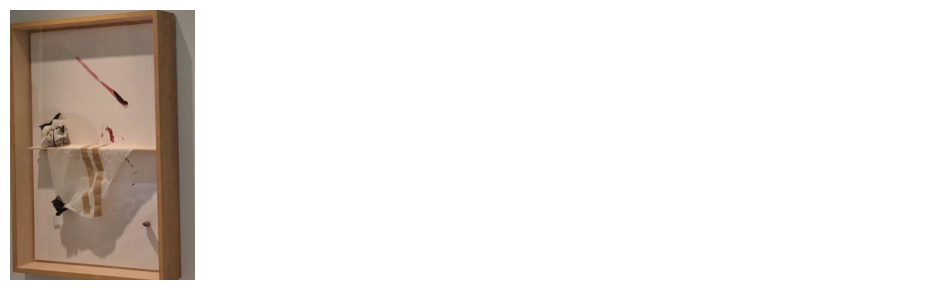

[[107, 30, 53, 74, 106]] [107]


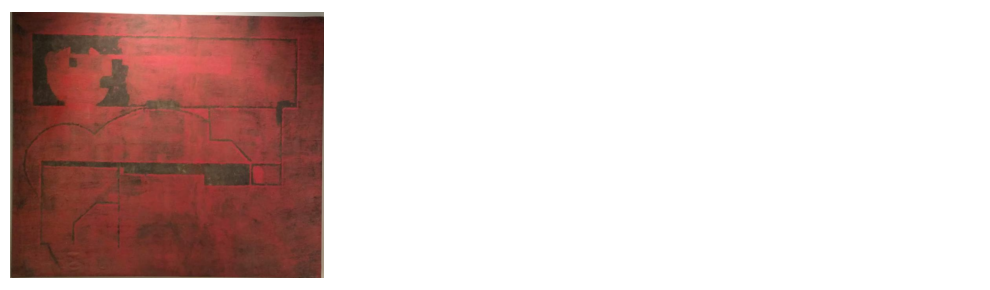

[[221, 35, 48, 205, 25], [285, 76, 85, 150, 257]] [280, 285]


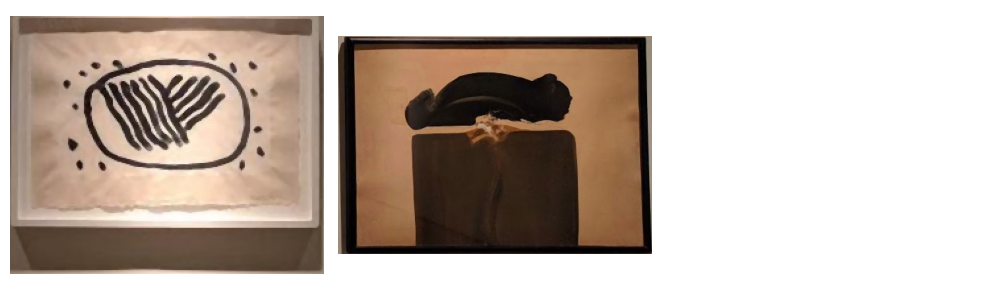

[[259, 32, 160, 192, 113]] [259]


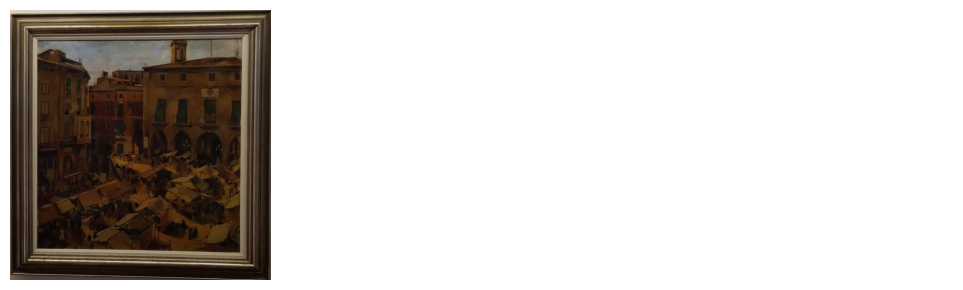

[[86, 61, 155, 27, 125]] [86]


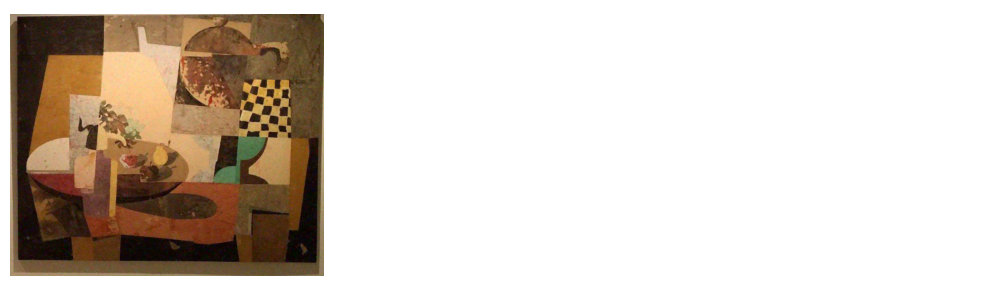

[[94, 192, 85, 103, 191], [132, 103, 104, 255, 87]] [94, 132]


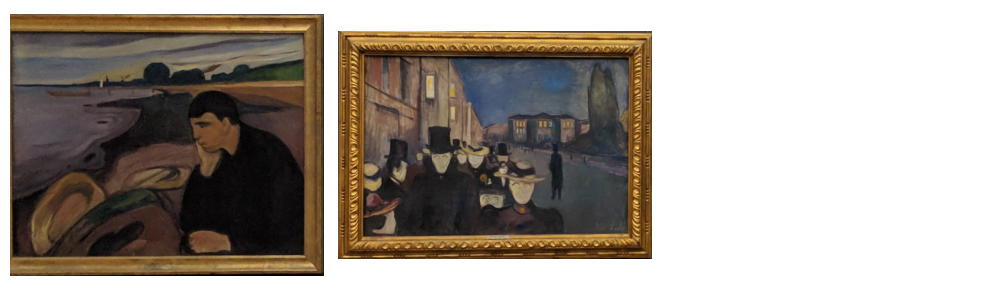

[[258, 42, 212, 24, 58], [35, 65, 40, 236, 120]] [258, 35]


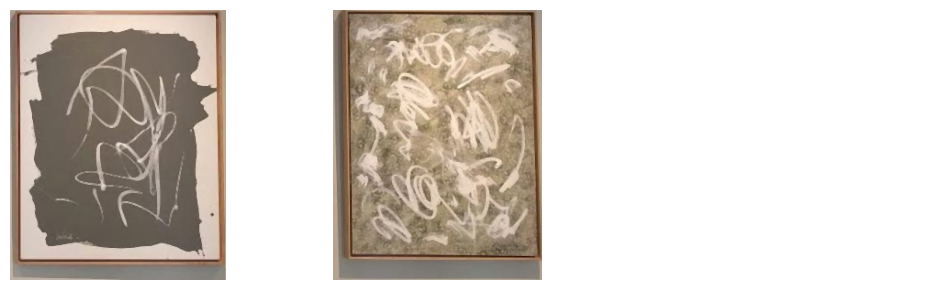

[[258, 42, 212, 24, 58], [35, 65, 236, 40, 47]] [258, 35]


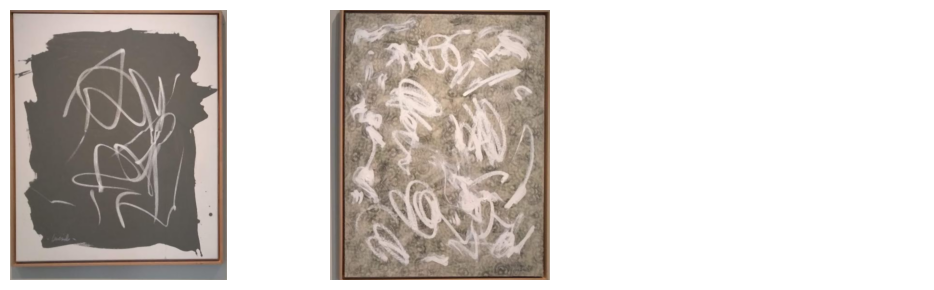

[[40, 161, 184, 106, 116], [258, 202, 94, 212, 22]] [104, 130]


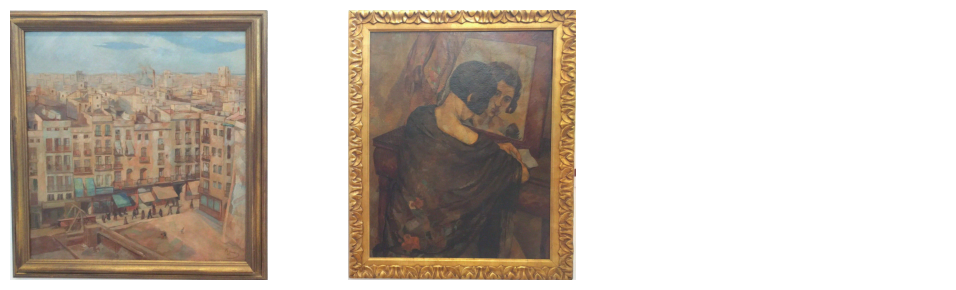

[[131, 110, 37, 273, 142]] [131]


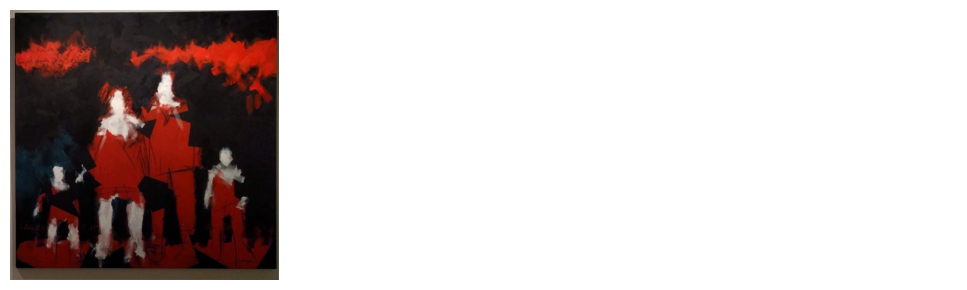

[[282, 264, 103, 57, 88]] [282]


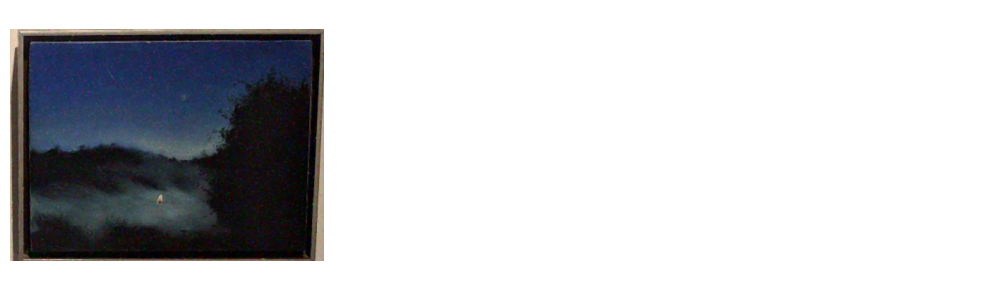

[[199, 96, 276, 173, 226], [34, 104, 142, 144, 84]] [199, 34]


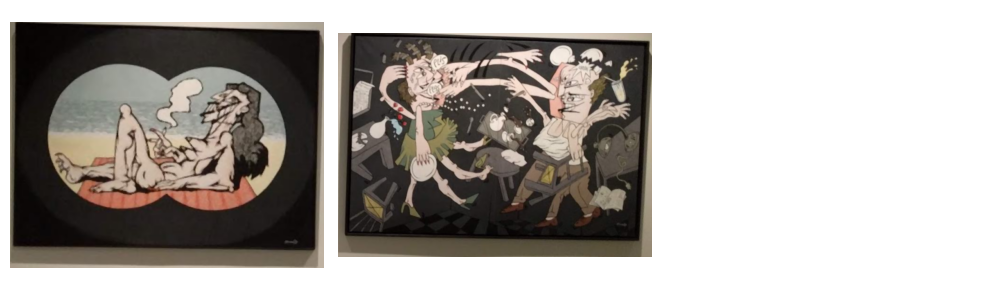

[[53, 54, 107, 238, 30], [124, 82, 29, 282, 172]] [53, 124]


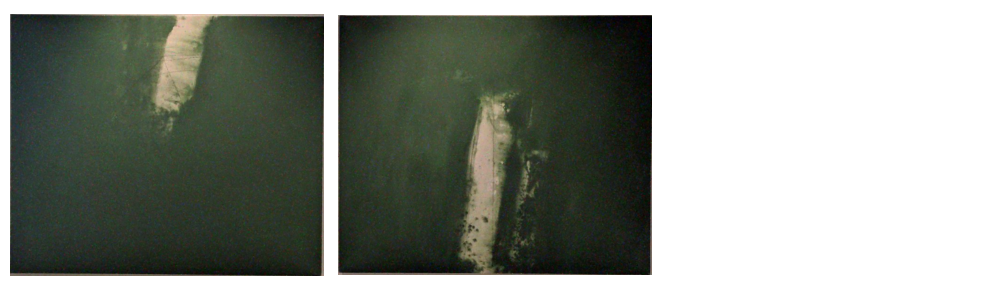

[[28, 282, 158, 59, 271]] [28]


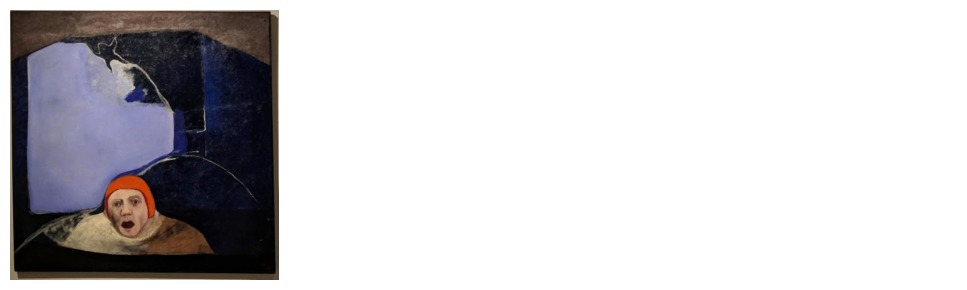

[[260, 279, 264, 91, 101]] [260]


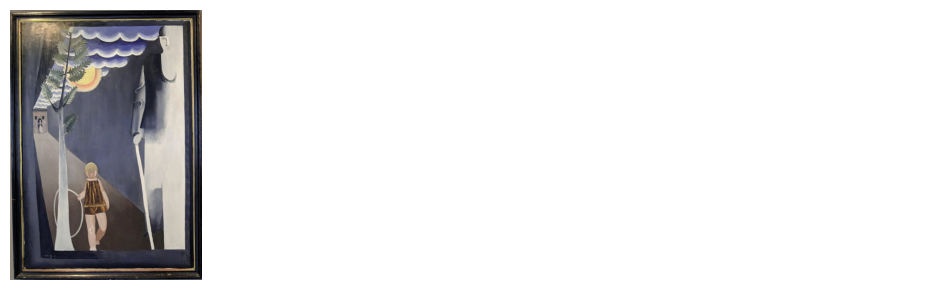

[[215, 192, 239, 39, 258]] [215]


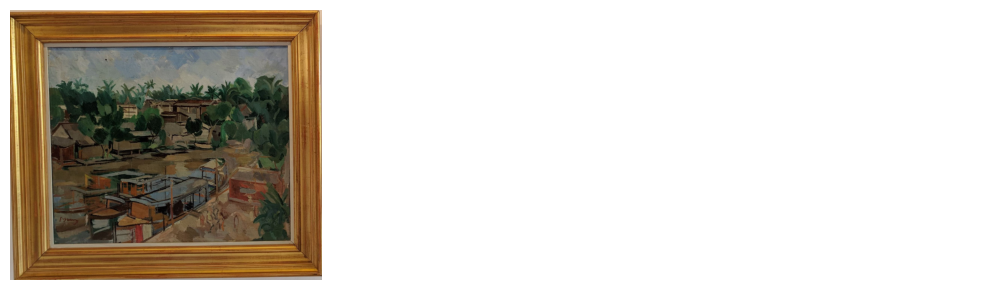

[[120, 70, 40, 161, 35]] [163]


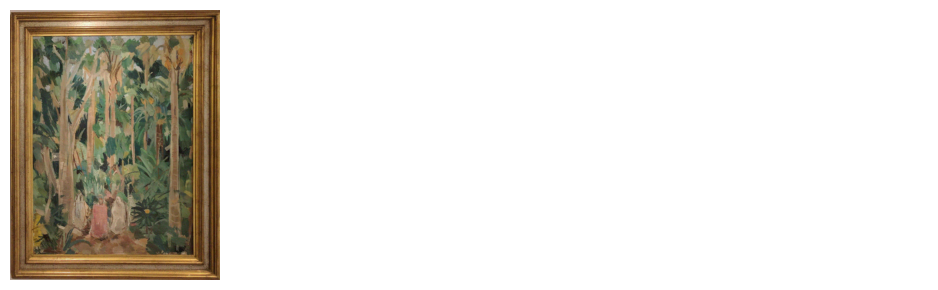

[[25, 40, 116, 35, 42]] [25]


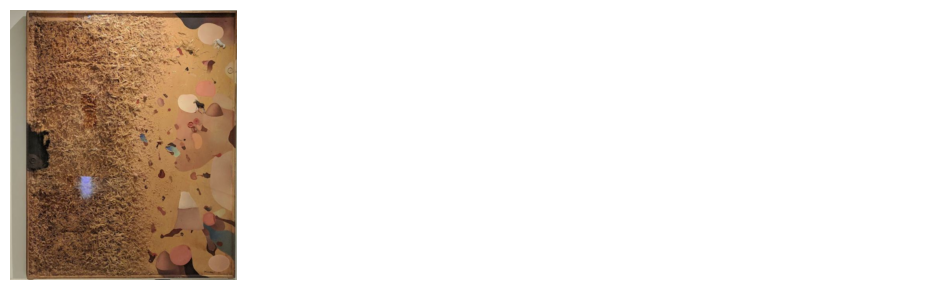

[[11, 30, 206, 106, 254]] [30]


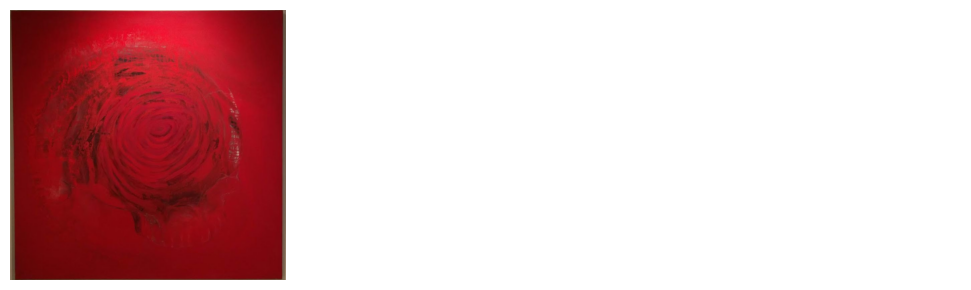

[[258, 176, 24, 42, 212], [264, 99, 279, 104, 259]] [176, 128]


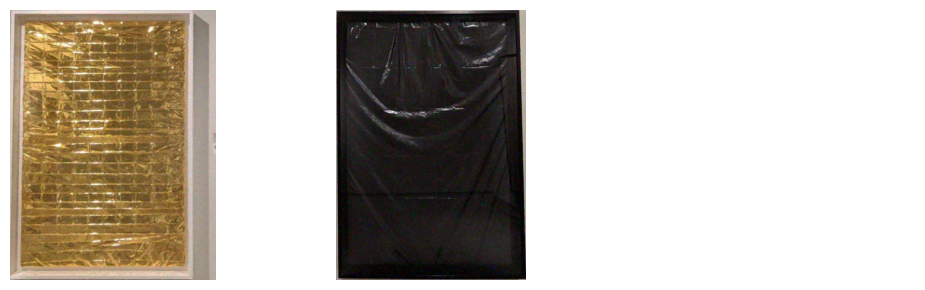

[[43, 57, 16, 142, 249]] [110]


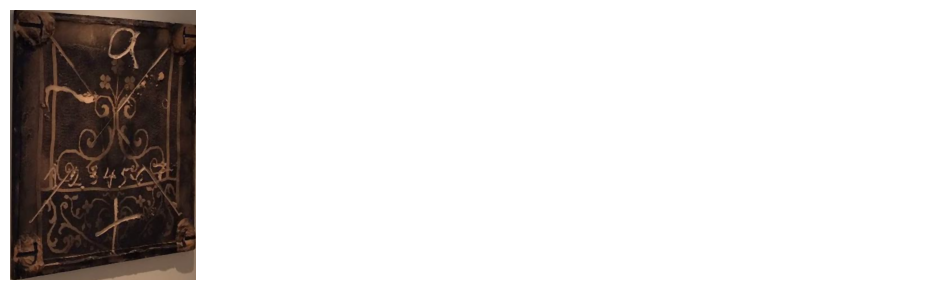

[[7, 182, 119, 217, 278]] [7]


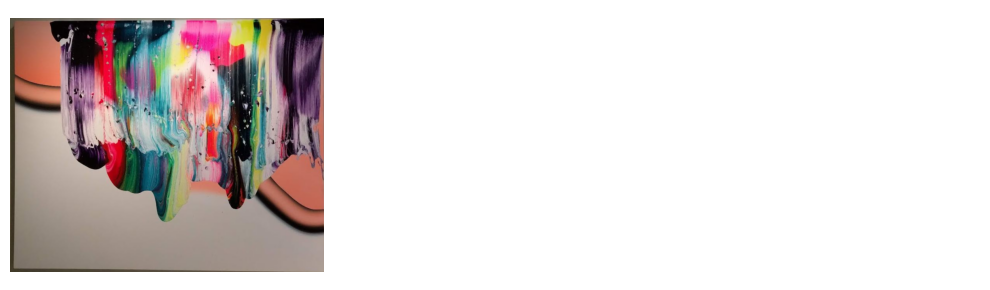

[[251, 35, 65, 189, 234]] [251]


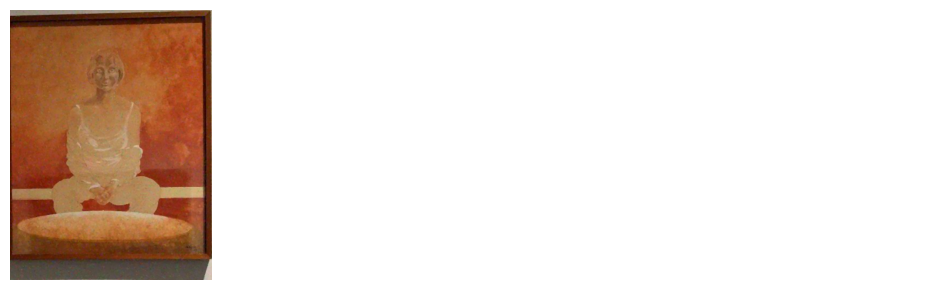

[[183, 75, 258, 24, 23]] [183]


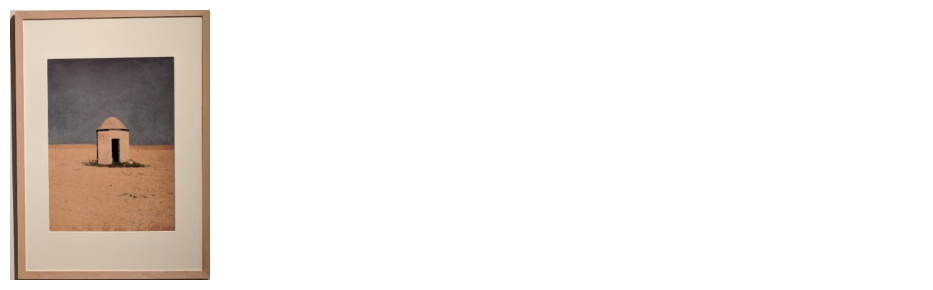

[[179, 219, 155, 218, 133]] [179]


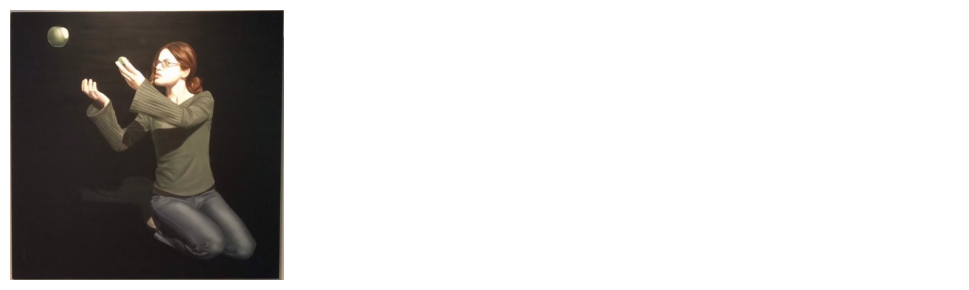

[[270, 47, 36, 24, 40]] [270]


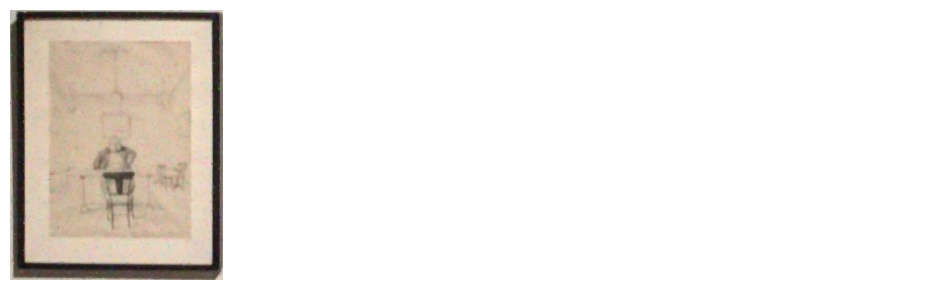

[[93, 142, 16, 157, 140]] [93]


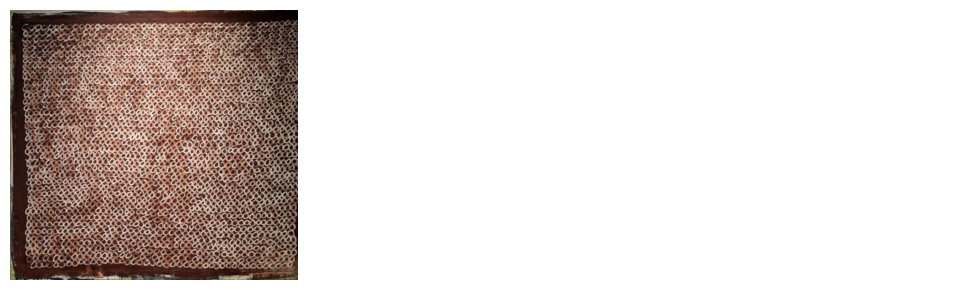

[[200, 205, 150, 35, 146]] [200]


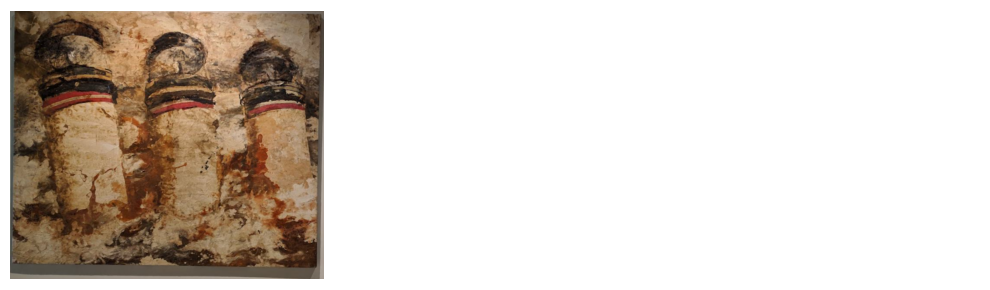

[[161, 40, 116, 35, 70]] [161]


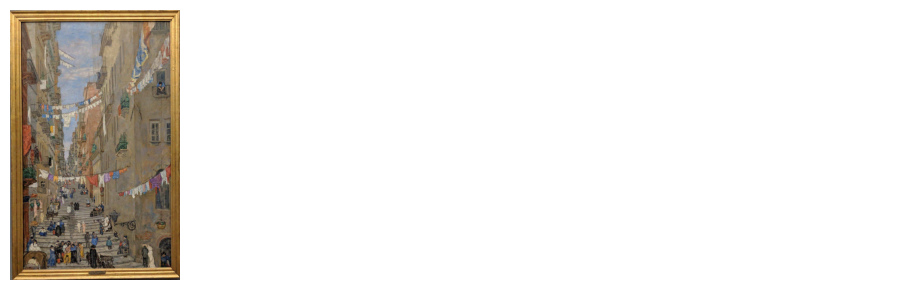

[[120, 36, 47, 35, 221], [252, 248, 102, 52, 60]] [182, 252]


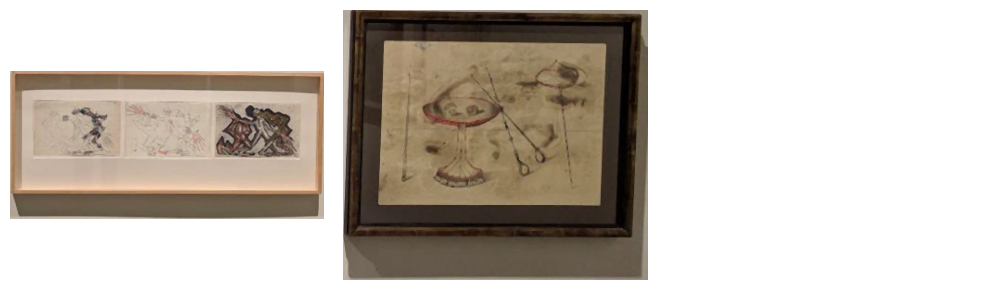

In [7]:
for paintings_image, retrieved_paintings, gt_paintings in zip(cropped_query_image_list, retrieved_images, GT_QSD2_W3_LIST):
    print(retrieved_paintings, gt_paintings)
    show_images(paintings_image)

In [8]:
# TODO REMOVE!

import numpy as np
from src.metrics import MeanAveragePrecisionAtK

m = MeanAveragePrecisionAtK()
k = 5

p = 0
n = 0

pbar = tqdm(zip(sorted(QSD2_W3_PATH.glob("*.jpg")), retrieved_images, GT_QSD2_W3_LIST))
for name, pred, gt in pbar:
    pbar.set_description(f"Processing {name.stem}")
    for pred_x, gt_x in zip(pred, gt):
        gt_x = np.array([[gt_x]])
        pred_x = np.array([pred_x])
        res = m.compute(gt_x, pred_x, k=k)
        p += res
        n += 1

print(p/n)

Processing 00029: : 30it [00:00, 5326.55it/s]

0.7948717948717948
